In [1]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                header=None)

df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


0) ID number 

1) Diagnosis (M = malignant, B = benign) 

    
2-31) Ten real-valued features are computed for each cell nucleus: 

In [2]:
df.shape

(569, 32)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:,2:].values

#M:惡性腫瘤 B:良性腫瘤
y = df.loc[:,1].values

#M->1;B->0
y = le.fit_transform(y)
#le.transform(['M','B'])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

##### Pipeline

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('std',StandardScaler()),
                    ('pca',PCA(n_components=2)),
                    ('clf',LogisticRegression(random_state=1))])

pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)
print pipe_lr.score(X_test,y_test)




0.947368421053


#### cross validation

In [6]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train,y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    

NameError: name 'np' is not defined

```python
list1 = ["这", "是", "一个", "测试"]
for i in range (len(list1)):
    print i ,list1[i]

上述方法有些累赘，利用enumerate()会更加直接和优美：
list1 = ["这", "是", "一个", "测试"]
for index, item in enumerate(list1):
    print index, item
>>>
0 这
1 是
2 一个
3 测试
```

In [10]:
from sklearn.cross_validation import cross_val_score
import numpy as np
scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=-1)
print 'CV accuracy: ',scores
print np.sum(scores)
print np.std(scores)

CV accuracy:  [ 0.93478261  0.97826087  0.95652174  0.97826087  0.97826087  1.          1.
  0.97777778  0.97777778  0.97777778]
9.75942028986
0.0180417805693


#### learning curce visualization

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


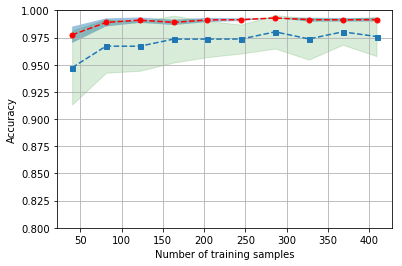

In [11]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([('std',StandardScaler()),('clf',LogisticRegression())])
pipe_lr.fit(X_train,y_train)

train_size, train_score, test_score = learning_curve(pipe_lr,\
                                                     X_train,y_train,\
                                                     train_sizes=np.linspace(0.1,1,10),\
                                                     cv=10,n_jobs=1)


train_mean = np.mean(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)

train_std = np.std(train_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.plot(train_size, train_mean, marker='o',linestyle='--', color='red', markersize= 5)


plt.fill_between(train_size, train_mean+train_std, train_mean-train_std, alpha=0.45)


plt.plot(train_size, test_mean, marker='s', linestyle='--', markersize= 5)

plt.fill_between(train_size, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')



plt.ylim([0.8,1])
plt.legend(loc='lower right')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.grid()
plt.show()






#### Validation curve

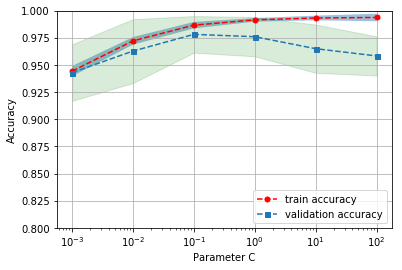

In [12]:
from sklearn.learning_curve import validation_curve

para = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores,test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train,
                                            param_name='clf__C',
                                            param_range=para,cv=10)
#pipe_lr.get_params().keys()

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(para, train_mean, marker='o',linestyle='--', color='red', markersize= 5,label='train accuracy')

plt.fill_between(para, train_mean+train_std, train_mean-train_std, alpha=0.45)

plt.plot(para, test_mean, marker='s', linestyle='--', markersize= 5,label='validation accuracy')

plt.fill_between(para, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')


plt.ylim([0.8,1])
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()



#### GridsearchCV

In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

pipe_sv = Pipeline([('scl', StandardScaler()),('clf',SVC(random_state=1))])
para = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
#estimator.get_params().keys()
param_grid = [{'clf__C':para,'clf__kernel':['linear']},\
              {'clf__C':para,'clf__gamma':para,'clf__kernel':['rbf']}]
grid_obj = GridSearchCV(pipe_sv,param_grid=param_grid,scoring='accuracy',cv=10)

grid_obj.fit(X_train,y_train)

print grid_obj.best_params_

best = grid_obj.best_estimator_

best.fit(X_train,y_train)

print best.score(X_test,y_test)

{'clf__C': 0.1, 'clf__kernel': 'linear'}
0.964912280702


In [15]:
scores = cross_val_score(pipe_sv,X,y,scoring='accuracy',cv=10,n_jobs=-1)
print np.mean(scores)
print np.std(scores)

0.97543535563
0.0251484960343


#### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
pipe_sv.fit(X_train,y_train)
y_pred = pipe_sv.predict(X_test)

confmat = confusion_matrix(y_test,y_pred)
print confmat


[[71  1]
 [ 2 40]]


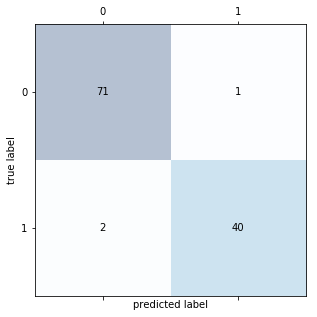

In [17]:
fig, ax = plt.subplots(figsize=(5,5))

ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

#### ROC曲線

- The function roc_curve computes the receiver operating characteristic curve, or ROC curve. 

- “A receiver operating characteristic (ROC) is a graphical plot which **illustrates the performance of a binary classifier system as its discrimination threshold is varied.** It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”

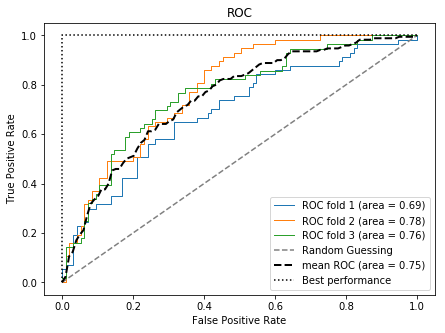

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
                            f1_score, roc_curve, auc, make_scorer
from scipy import interp

X_train2 = X_train[:,[4,14]]
cv = list(StratifiedKFold(n_splits=3,random_state=1).split(X_train,y_train))

#Set figure
fig = plt.figure(figsize=(7,5))
#initalize y
mean_tpr = 0.0
#initalize x
mean_fpr = np.linspace(0, 1, 100)

all_tpr = []


#plot ROC of fold1,2,3
for i, (train,test) in enumerate(cv):
    prob = pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
                                #y_true, y_score
    fpr, tpr, thresh = roc_curve(y_train[test],prob[:,1],pos_label=1)
    
    #interpolation.
    mean_tpr += interp(mean_fpr,fpr,tpr)
    
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr,tpr)
    
    plt.plot(fpr,tpr,lw=1,label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    


#plot ROC of Random Guessing
plt.plot([0,1],[0,1],linestyle = '--',color='gray',label='Random Guessing')


#plot ROC of Mean
mean_tpr /= len(cv)
#mean_tpr[-1]=1.0

mean_auc = auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr,mean_tpr,linestyle = '--',color='black',lw=2,label='mean ROC (area = %0.2f)'\
                                         % mean_auc)

#plot ROC of Best Performance
plt.plot([0,0,1],[0,1,1],linestyle = ':',color='black',label='Best performance')



#Modify jpg and show
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()